DSA_feature 데이터 셋으로

비선형 활성화 함수를 쓰는 비선형 오토인코더 모델을 구현.

비선형 오토인코더 모델 중에서 인코더와 디코더의 구조가 대칭인 인코더와

인코더와 디코더의 구조가 비대칭인 비대칭 인코더

2가지를 구현해본다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.isnull().values.any()

False

In [4]:
# activity 열에서 'lyingBack', 'lyingRigh', 'sitting' 만 추출하기
df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'sitting'])]
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lyingRigh,p8


In [5]:
# 제대로 원하는 값들이 추출되었는지 확인하는 과정
df['activity'].unique(), df.shape, df['activity'].value_counts()

(array(['sitting', 'lyingBack', 'lyingRigh'], dtype=object),
 (1440, 272),
 activity
 sitting      480
 lyingBack    480
 lyingRigh    480
 Name: count, dtype: int64)

In [6]:
# 'activity' 열 전처리: lyingBack, lyingRigh -> 정상 (0), sitting -> 비정상 (1)
df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
df

/var/folders/85/k4yp9vwd2wv_66s9g8k0qsvr0000gn/T/ipykernel_85155/1868954632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0,p8


/var/folders/85/k4yp9vwd2wv_66s9g8k0qsvr0000gn/T/ipykernel_85155/2564224221.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


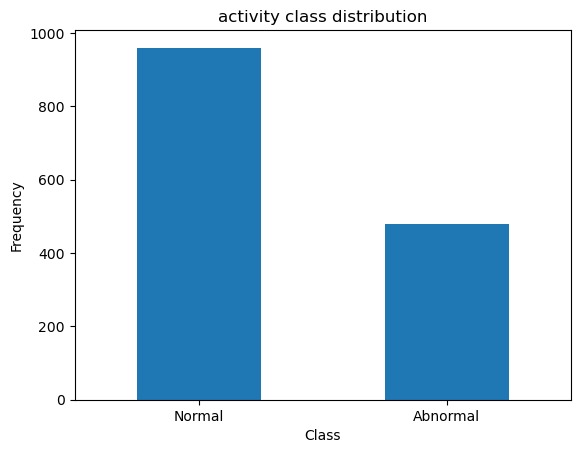

In [7]:
LABELS = ["Normal","Abnormal"]
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test = train_test_split(df, test_size=0.2,shuffle=True, random_state=42)
x_train, x_valid = train_test_split(x_train, test_size=0.2,shuffle=True, random_state=42)

# 정상 데이터(0)만 사용하여 학습에 활용 (lyingBack, lyingRight)
# values를 통해 넘파이 배열로 바꿔주기
x_train = x_train[x_train.activity == 0]
x_train = x_train.drop(['activity', 'people'], axis=1).values

x_valid = x_valid[x_valid.activity == 0]
x_valid = x_valid.drop(['activity', 'people'], axis=1).values

# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
y_test = x_test['activity']  # 테스트 데이터에서 활동 라벨만 남기기
x_test = x_test.drop(['activity', 'people'], axis=1).values

x_train.shape, x_valid.shape, x_test.shape, y_test.shape

((607, 270), (156, 270), (288, 270), (288,))

In [9]:
# StandardScaler로 데이터 정규화
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

x_train.shape, x_valid.shape, x_test.shape

((607, 270), (156, 270), (288, 270))

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [32]:
# 선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def linear_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='linear')(input_layer)
    encoded = Dense(int(encoding_dim/2), activation='linear')(encoded)
    decoded = Dense(int(encoding_dim/2), activation='linear')(encoded)
    decoded = Dense(input_dim, activation='linear')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
autoencoder = linear_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 27)             │         7,317 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 13)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 270)            │         3,780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,643 (45.48 KB)

 Trainable params: 11,643 (45.48 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8210 - val_loss: 0.6879
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8251 - val_loss: 0.6394
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8197 - val_loss: 0.5765
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8164 - val_loss: 0.5177
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8446 - val_loss: 0.4733
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7234 - val_loss: 0.4447
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7428 - val_loss: 0.4295
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5452 - val_loss: 0.4160
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6749 - val_loss: 0.4062
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4669 - val_loss: 0.3979
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4959 - val_loss: 0.3848
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4753 - val_lo

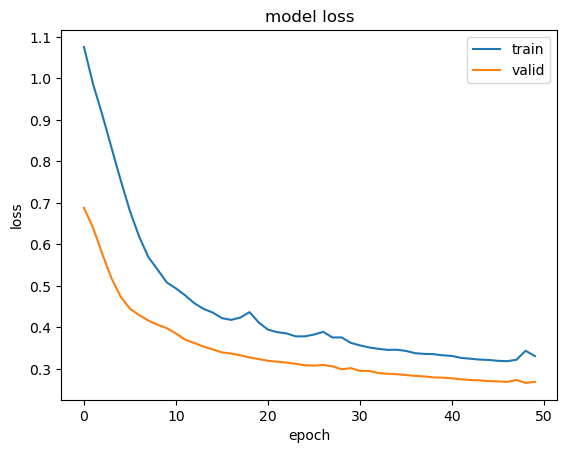

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [35]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

#분석


predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()
     

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.136971,0.315972
std,36.996820,0.465711
min,0.072347,0.000000
25%,0.122394,0.000000
50%,0.215463,0.000000
75%,0.615226,1.000000
max,619.197884,1.000000


In [11]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_symmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(encoding_dim, activation='relu')(decoded)

    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
autoencoder = non_linear_symmetric_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 27)             │         7,317 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │           378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 270)            │         7,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,801 (61.72 KB)

 Trainable params: 15,801 (61.72 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = autoencoder.fit(x_train,x_train,epochs=30,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2414 - val_loss: 0.9142
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1283 - val_loss: 0.8006
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8085 - val_loss: 0.6730
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6683 - val_loss: 0.6298
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9002 - val_loss: 0.6035
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7716 - val_loss: 0.5928
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6744 - val_loss: 0.5872
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0559 - val_loss: 0.5842
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7978 - val_loss: 0.5816
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9914 - val_loss: 0.5779
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8086 - val_loss: 0.5749
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9618 - val_lo

In [37]:
error_df.head
#정상 데이터의 Reconstruction Error 를 분석해보면

#최솟값은 0.07 최댓값은 4.45 이고

#데이터의 분포는 3분위수값을 보면 0.22 값 아래로 데이터의 75%가 분포 해 있음을 알 수 있다.

<bound method NDFrame.head of      reconstruction_error  true_class
0                0.713938           1
1                0.227313           0
2                0.473957           0
3                1.112969           1
4                0.222151           0
..                    ...         ...
283              0.122274           0
284              0.342952           1
285              0.270915           0
286              0.080900           0
287              0.075233           0

[288 rows x 2 columns]>

In [39]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()
#비정상 데이터의 Reconstruction Error를 분석해보면

#최솟값은 0.34, 최댓값은 655로 분포해 있고

#3분위수 값을 통하여 데이터의 75%가 0.74 값 아래 있음을 알 수 있다.

#따라서 최적의 threshold를 정할 때 정상 데이터 분석과 비교해서 0.3정도면 적당할 것이다.

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.278083,0.0
std,0.571766,0.0
min,0.072347,0.0
25%,0.111322,0.0
50%,0.144653,0.0
75%,0.227313,0.0
max,4.704788,0.0


In [40]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,9.325990,1.0
std,65.631598,0.0
min,0.305217,1.0
25%,0.595340,1.0
50%,0.713938,1.0
75%,0.903923,1.0
max,619.197884,1.0


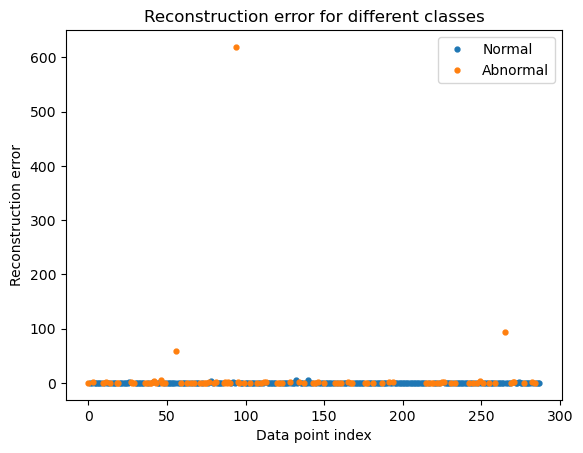

In [41]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [42]:
threshold =0.3

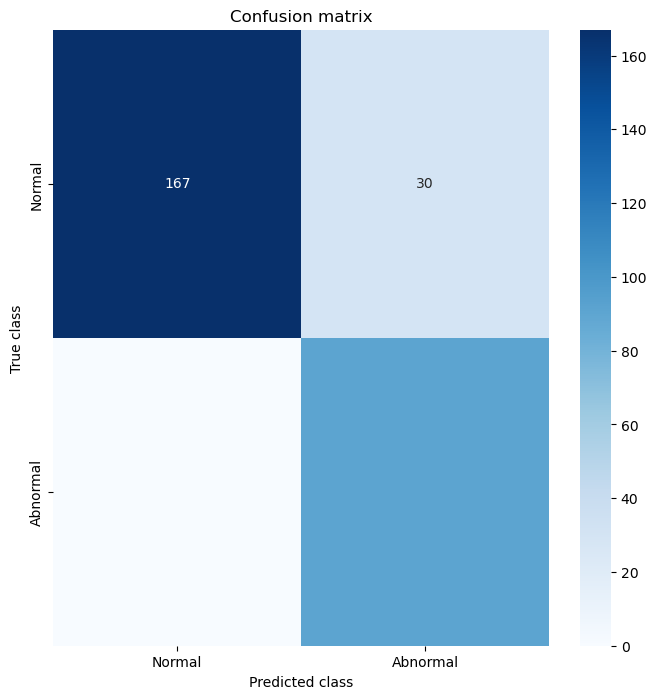

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       197
           1       0.75      1.00      0.86        91

    accuracy                           0.90       288
   macro avg       0.88      0.92      0.89       288
weighted avg       0.92      0.90      0.90       288



In [43]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

선형 오토인코더는 활성화 함수로 'relu' 등이 필요가 없다

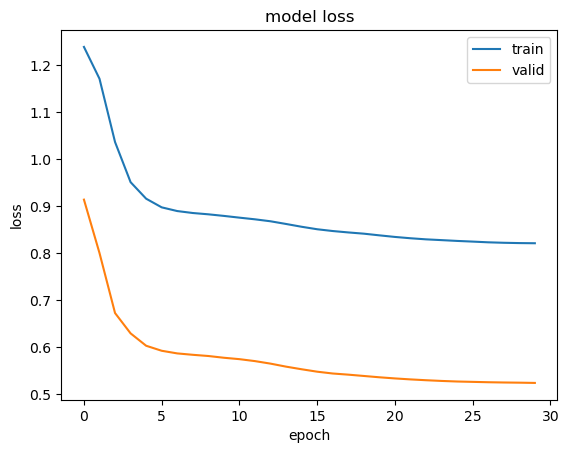

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [14]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.732258,0.315972
std,42.472198,0.465711
min,0.137132,0.000000
25%,0.311670,0.000000
50%,0.457722,0.000000
75%,0.873788,1.000000
max,713.117554,1.000000


In [15]:
error_df.head()

,reconstruction_error,true_class
0,1.024203,1
1,0.490542,0
2,0.664070,0
3,1.484693,1
4,0.459393,0


In [16]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.502986,0.0
std,0.833472,0.0
min,0.137132,0.0
25%,0.289374,0.0
50%,0.332531,0.0
75%,0.461744,0.0
max,8.883204,0.0


In [17]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.723101,1.0
std,75.356772,0.0
min,0.492642,1.0
25%,0.849238,1.0
50%,0.984271,1.0
75%,1.308558,1.0
max,713.117554,1.0


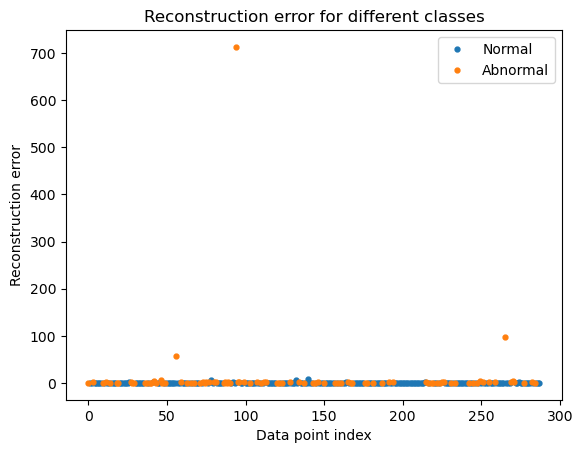

In [18]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [19]:
threshold =0.6

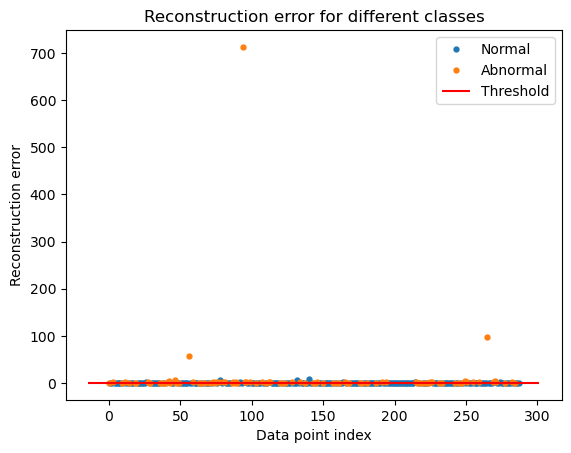

In [20]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

confusion_matrix, classification_report 를 통해 여러 수치 확인하기.

Precision (정밀도): 정밀도는 모델이 Positive 클래스로 예측한 샘플 중에서 실제로 Positive인 샘플의 비율

Recall (재현율): 재현율은 실제 Positive 샘플 중에서 모델이 Positive으로 올바르게 예측한 비율

F1-Score: F1-Score는 정밀도와 재현율의 조화 평균. 즉, 정밀도와 재현율의 균형을 고려한 지표로, 두 값이 비슷할 때 높은 값을 가진다.

Accuracy (정확도): 정확도는 전체 샘플 중에서 모델이 올바르게 예측한 샘플의 비율

Macro Avg (매크로 평균): 클래스 간의 비율에 관계없이 단순 평균을 낸 값

Weighted Avg (가중 평균): 클래스 비율에 따라 가중치를 부여한 평균

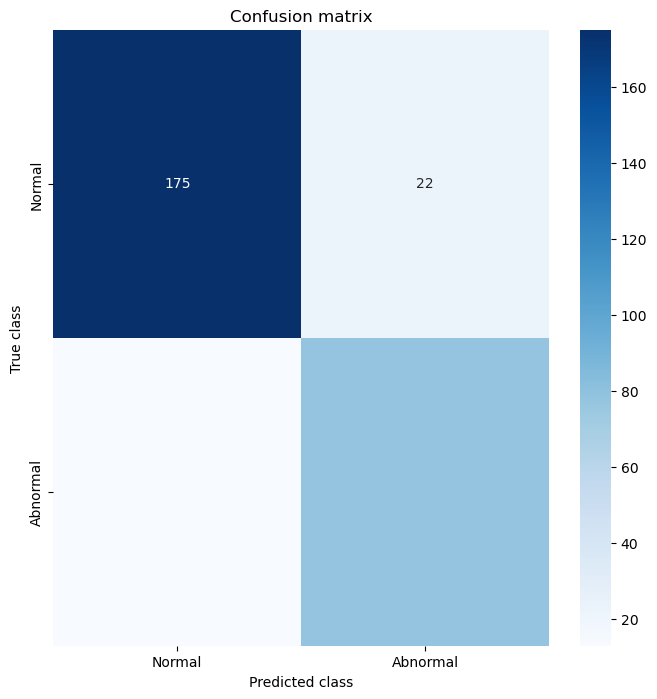

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       197
           1       0.78      0.86      0.82        91

    accuracy                           0.88       288
   macro avg       0.86      0.87      0.86       288
weighted avg       0.88      0.88      0.88       288



In [21]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [22]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_asymmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    # 첫 번째 인코더 층
    encoded = Dense(int(encoding_dim*2), activation='relu')(input_layer)
    # 두 번째 인코더 층(최종 압축)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    # 첫 번째 디코더 층
    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    # 두 번째 디코더 층
    decoded = Dense(int(encoding_dim), activation='relu')(decoded)
    
    decoded = Dense(int(encoding_dim*2), activation='relu')(decoded)
    decoded = Dense(int(encoding_dim*4), activation='relu')(decoded)

    # 세번째 디코더 층(최종 복원 층)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
asy_autoencoder = non_linear_asymmetric_autoencoder(input_dim, encoding_dim)

asy_autoencoder.compile(optimizer='adam', loss='mse')
asy_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │        14,634 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 13)             │           715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 27)             │           378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 54)             │         1,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 108)            │         5,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 270)            │        29,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,791 (206.21 KB)

 Trainable params: 52,791 (206.21 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history2 = asy_autoencoder.fit(x_train,x_train,epochs=30,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3253 - val_loss: 0.8779
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1465 - val_loss: 0.6819
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0992 - val_loss: 0.6512
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9588 - val_loss: 0.6262
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9110 - val_loss: 0.5973
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7837 - val_loss: 0.5765
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9904 - val_loss: 0.5624
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6389 - val_loss: 0.5537
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8181 - val_loss: 0.5476
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9233 - val_loss: 0.5425
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9178 - val_loss: 0.5380
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9920 - val_lo

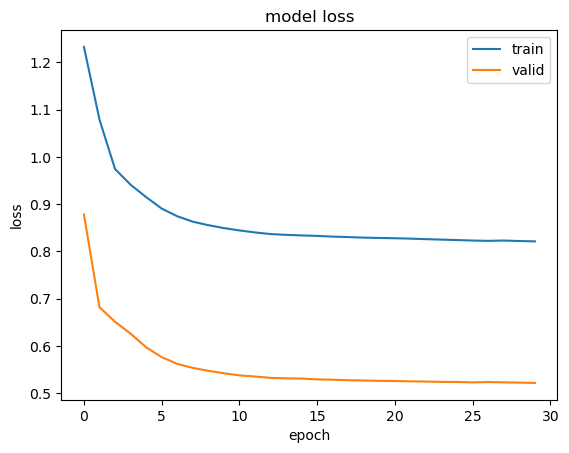

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [25]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = asy_autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.723175,0.315972
std,42.414735,0.465711
min,0.140962,0.000000
25%,0.307166,0.000000
50%,0.452632,0.000000
75%,0.833370,1.000000
max,712.016985,1.000000


In [26]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.497358,0.0
std,0.821287,0.0
min,0.140962,0.0
25%,0.284981,0.0
50%,0.339459,0.0
75%,0.463743,0.0
max,8.771770,0.0


In [27]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.706537,1.0
std,75.254812,0.0
min,0.485318,1.0
25%,0.815712,1.0
50%,0.949308,1.0
75%,1.322284,1.0
max,712.016985,1.0


In [28]:
threshold = 0.7

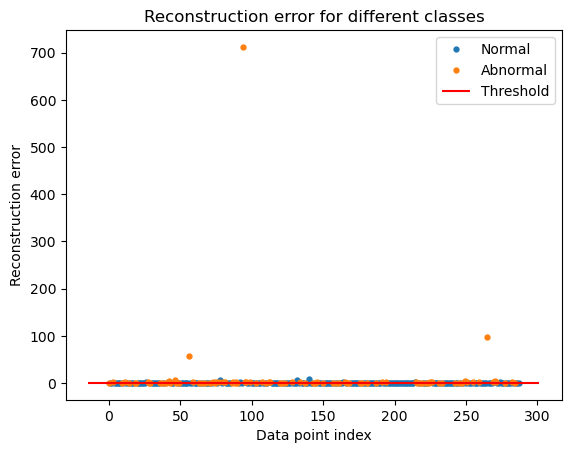

In [29]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

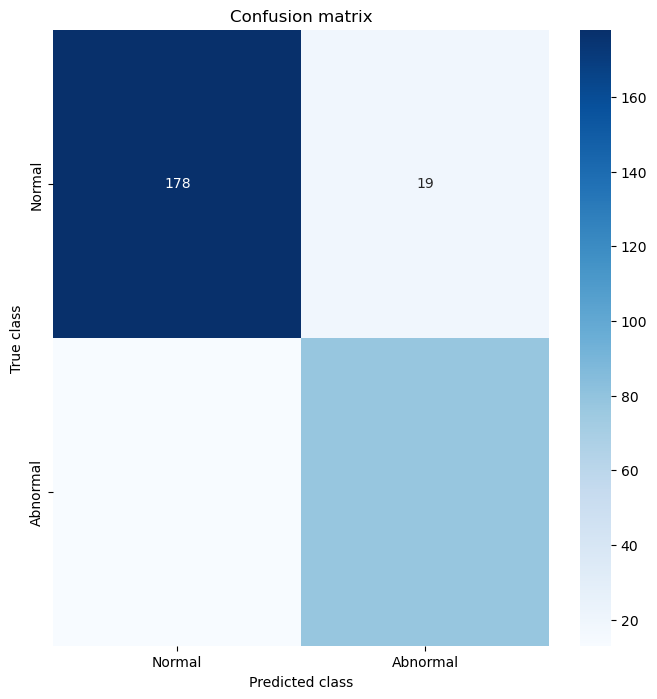

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       197
           1       0.80      0.86      0.83        91

    accuracy                           0.89       288
   macro avg       0.87      0.88      0.87       288
weighted avg       0.89      0.89      0.89       288



In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))